## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on credit card fraud detection. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time. 

### Credit Card Fraud Detection
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
import pandas as pd
data=pd.read_csv('creditcard_train.csv')

In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284657, 31)

In [4]:
#check missing values:
data.isnull().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [5]:
data[data['Class']==1].isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Remove 278+520 observations due to missing values, and and 212,727 observations remain for further analysis.

In [6]:
data.dropna(inplace=True)
data.shape

(283859, 31)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,...,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000
mean,94849.267513,-0.000167,-0.000924,0.000840,-0.001027,0.000986,0.000320,0.001084,-0.000325,0.000471,...,0.000032,-0.000061,0.000029,-0.000034,-0.000195,-0.000047,-0.000069,-0.000004,88.425282,0.001557
std,47485.589194,1.957120,1.651392,1.510740,1.414242,1.378982,1.332545,1.231812,1.193685,1.097651,...,0.734539,0.726050,0.625304,0.605745,0.521419,0.482196,0.403610,0.330418,250.417781,0.039430
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54233.000000,-0.920680,-0.598997,-0.889830,-0.848736,-0.691172,-0.768154,-0.553805,-0.208758,-0.642788,...,-0.228575,-0.542885,-0.162195,-0.354648,-0.317359,-0.326893,-0.070855,-0.052952,5.600000,0.000000
50%,84759.000000,0.017308,0.065413,0.179494,-0.020497,-0.054066,-0.274031,0.040309,0.022302,-0.051331,...,-0.029437,0.007510,-0.011591,0.040912,0.016212,-0.052016,0.001322,0.011233,22.000000,0.000000
75%,139344.000000,1.315648,0.803676,1.026844,0.742006,0.612485,0.398944,0.570649,0.327335,0.597329,...,0.186632,0.529301,0.148065,0.439530,0.350601,0.240762,0.091043,0.078314,77.250000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,...,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


Remove outliers for Normal group that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR except variable 'Time':

In [8]:
class1=data[data['Class']==1]
class0=data[data['Class']==0]
cols = class0.columns.delete(0) #no need for'Time'
Q1=class0[cols].quantile(0.25)  
Q3=class0[cols].quantile(0.75)
IQR=Q3-Q1
class0=class0[~((class0< (Q1 - 2.5 * IQR)) |(class0 > (Q3+ 2.5 * IQR))).any(axis=1)]
data=pd.concat([class0,class1])
data['Class'].value_counts()

0    212285
1       442
Name: Class, dtype: int64

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

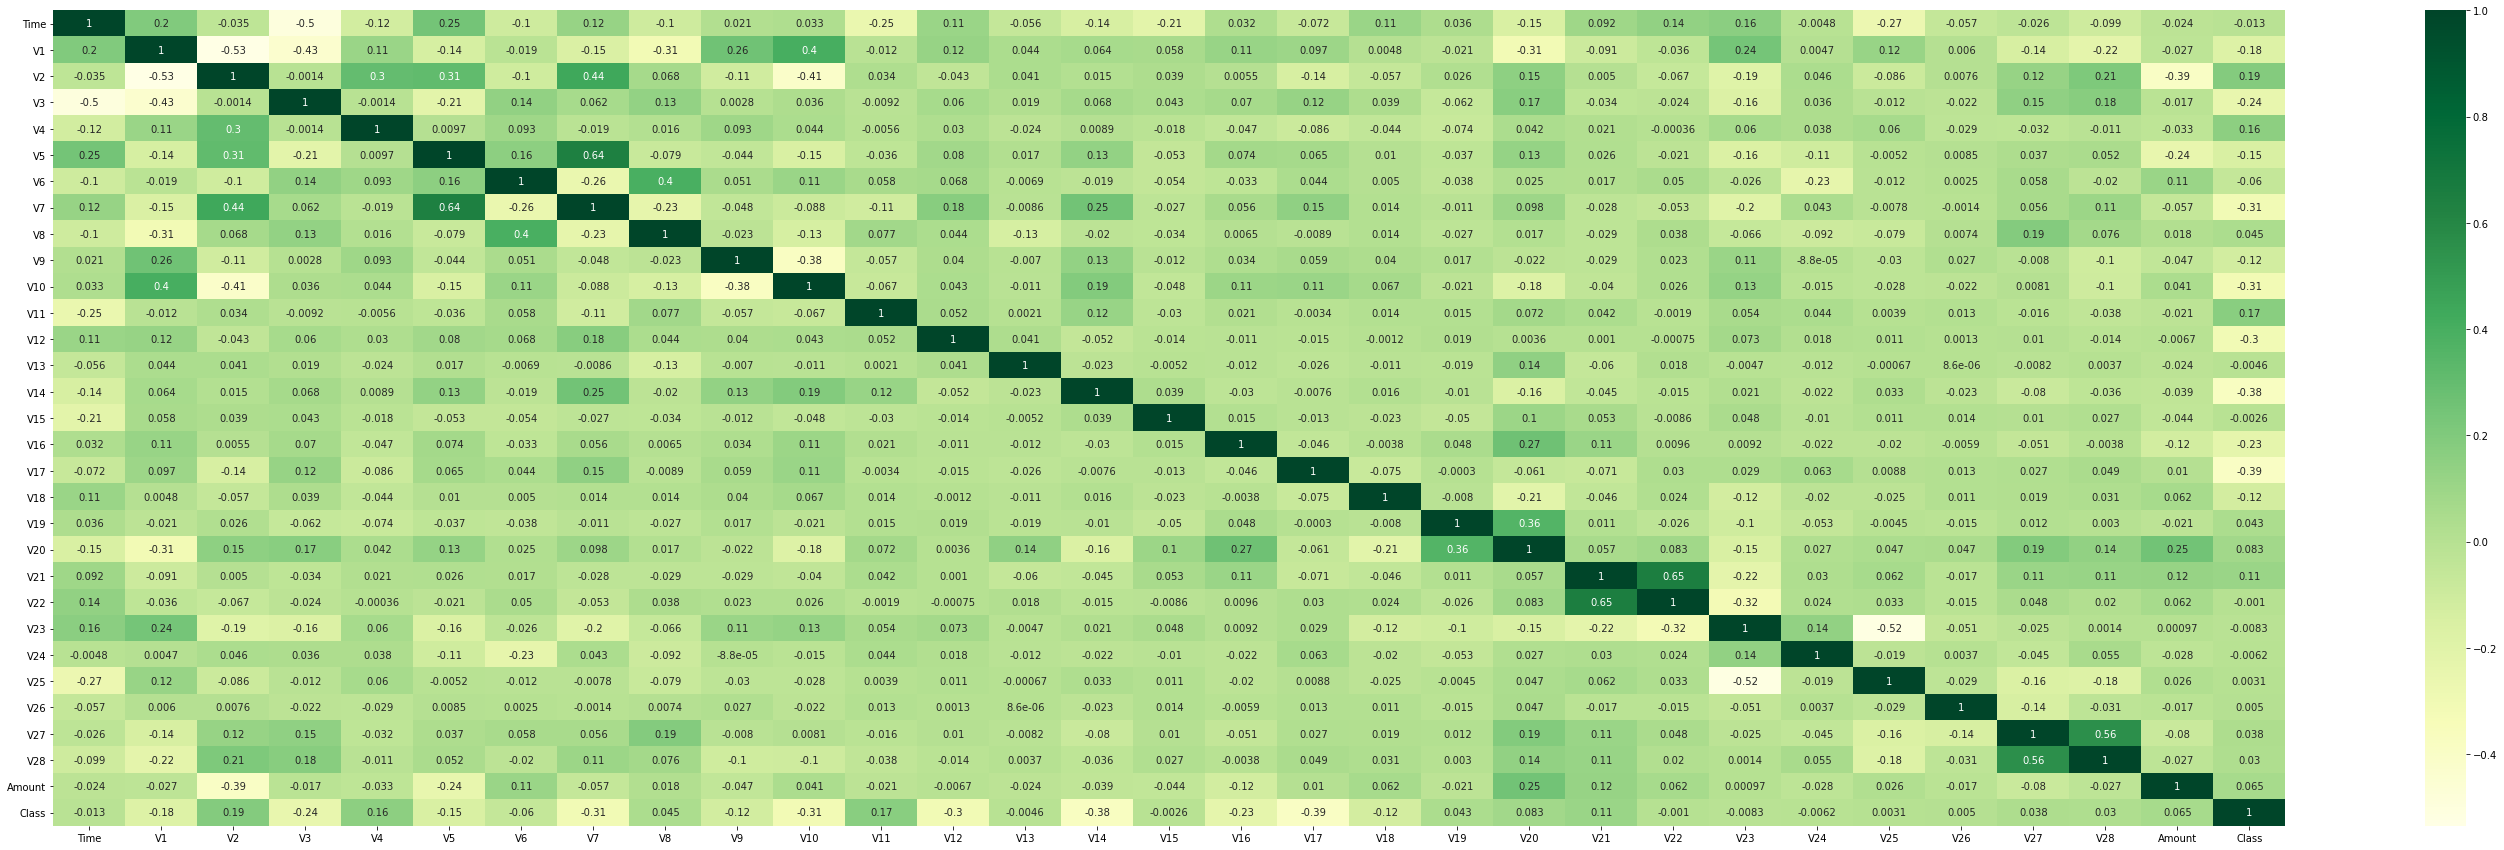

In [10]:
#plot correlation heatmap
plt.figure(figsize = (50,15))
sns.heatmap(data.corr(), annot = True,cmap='YlGn')

The largest absolute value of correlation coefficients is 0.65 from V21 and V22. In general, there's no strong linear correlaton between each pair of variables.

C:\Users\xueya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\xueya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


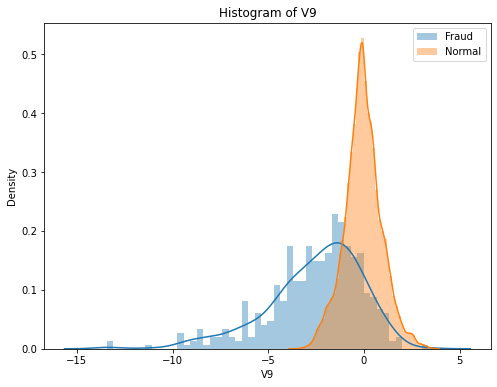

C:\Users\xueya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\xueya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


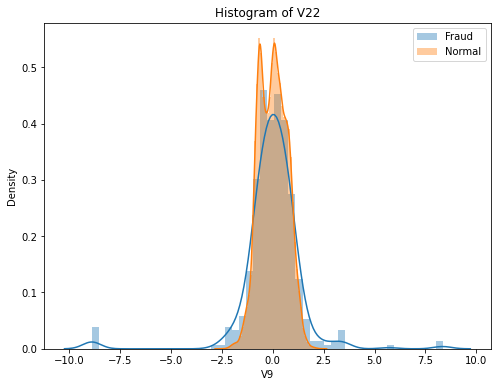

In [11]:
#plot typical distributions of variables
attributes=['V9','V22']
for a in attributes:
    plt.subplots(figsize=(8,6))
    sns.distplot(data[data['Class']==1][a], bins=50,label='Fraud')
    sns.distplot(data[data['Class']==0][a], bins=50,label='Normal')
    plt.xlabel('V9')
    plt.title('Histogram of '+a )
    plt.legend()
    plt.show()

Almost all variables approximate a normal distribution to some extent for each Fraud and Normal group. And there are two kinds of typical distributions. V9 and V22 for instance as above.

For variable V9, the Normal group is more intensive and the Normal group's mode value does not well coincide with the Fraud group's(a translation seems to exist). Variable V1,V2,V3,V4,V5,V6,V7,V10,V11,V12,V14,V16,V17,V18,V19,V21 have similar patterns.

While for V25, there isn't much of a difference of distributions between two groups, which may contribute litte to futher classification. Variable V8,V13,V15,V20,V22,V23,V24,V26,V27,V28 have similar patterns.

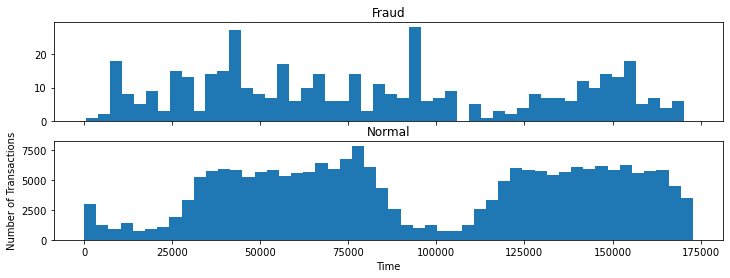

In [12]:
#histplot of 'Time':
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

ax1.hist(data[data['Class']==1]['Time'], bins=50)
ax1.set_title("Fraud")

ax2.hist(data[data['Class']==0]['Time'], bins=50)
ax2.set_title("Normal")

plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()

The Fraud group has a more even time distribution. The Normal group, on the other hand, appears to have a transaction period.

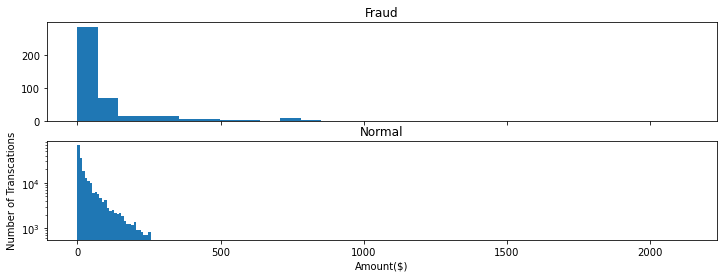

In [13]:
#histplot of 'Amount':
fig, (ax3, ax4) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

ax3.hist(data[data.Class==1]['Amount'], bins=30)
ax3.set_title("Fraud")

ax4.hist(data[data.Class==0]['Amount'], bins=30)
ax4.set_title("Normal")

plt.xlabel("Amount($)")
plt.ylabel("Number of Transcations")
plt.yscale("log")
plt.show()

There is a significant difference in the distribution of amounts between two groups. The Fraud group's maximum amount is very small, and the distribution is relatively insentive in small transactions.

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

We do not involve time series analysis at present. Remove variable 'Time':

In [14]:
data.drop(['Time'],axis=1,inplace=True)

Notice that variable 'Amount' has a large scale. We normalize it first.

In [15]:
from sklearn.preprocessing import StandardScaler
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.956369,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.716139,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.481272,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.507980,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.698314,0


PCA

In [16]:
from sklearn.decomposition import PCA
X=data.drop(['Class'],axis=1)
y=data['Class']

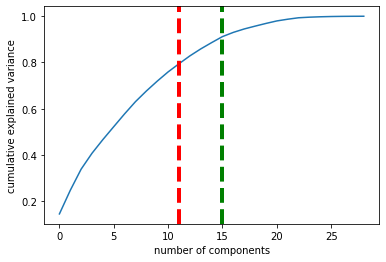

In [17]:
#PCA Variance ratio:
import numpy as np
plt.plot(np.cumsum(PCA(X.shape[1]).fit(X).explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r',linestyle= "--", x = 11, ymin = 0, ymax=1)
plt.axvline(linewidth=4, color='g',linestyle= "--", x = 15, ymin = 0, ymax=1)

As the figure shows, the explained variance ratio reaches nearly 80% when n components=11, and about 90% when n components=15.

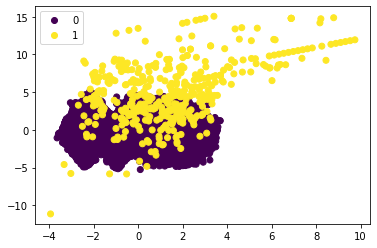

In [18]:
#visualization for n_components=2:
pca= PCA()
X_pca= pca.fit_transform(X)
scatter=plt.scatter(X_pca[:, 0],X_pca[:, 1],c=y)
labels = np.unique(y)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)

There appears to be no clear distinction between the Normal and Fraud groups. Of course the explained variance ratio for 2 components is low and there is a lot of information sacrificed.  
However, there are a large number of Fraud observations that deviate significantly from the Normal group.

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

Load packages:

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree

Undersampling: randomly select all(N=442) fraud observations and the same size of N Normal observations, and use 2*N=884 samples for model fitting and training:

In [20]:
print(data['Class'].value_counts())
undersampled0=data[data['Class']==0].sample(442)
undersampled1=data[data['Class']==1].sample(442)
train=pd.concat([undersampled0,undersampled1])
print(train.shape)
x_train=train.drop('Class',axis=1)
y_train=train['Class']

0    212285
1       442
Name: Class, dtype: int64
(884, 30)


In [21]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

Test data preprocessing like before:

In [22]:
test=pd.read_csv('creditcard_test.csv').drop('Time',axis=1)
test['Amount'] = StandardScaler().fit_transform(test['Amount'].values.reshape(-1, 1))
x_test=test.drop(['Class'],axis=1)
y_test=test['Class']

1.Logistic regression method:

C:\Users\xueya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\xueya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.98


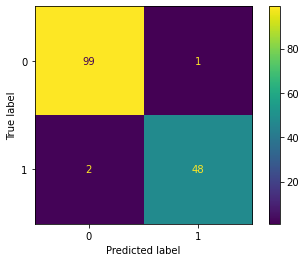

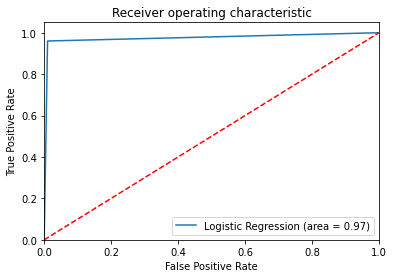

In [23]:
#HyperParameter tuning of C by 5-fold cv:
C=[0.01,0.1,1,10,100]
log_cv_scores=[]
for c in C:
    log=LogisticRegression(random_state=0,C=c)
    log_cv_score= cross_val_score(log, x_train, y_train, cv=5, scoring='accuracy')
    log_cv_scores.append(log_cv_score.mean())
optimal_C_index = log_cv_scores.index(max(log_cv_scores))
optimal_C = C[optimal_C_index]

log=LogisticRegression(random_state=0,C=optimal_C)
log.fit(x_train, y_train)
log_pred=log.predict(x_test)

#accuracy:
log_acc_score = accuracy_score(y_test, log_pred).round(4)
print(log_acc_score)

#confusion matrix:
cm1=confusion_matrix(y_test, log_pred)
ConfusionMatrixDisplay(cm1).plot()

#roc curve:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_pred)
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The accuracy of logistic model with best C parameter is 0.98.

2.SVC method:

0.96


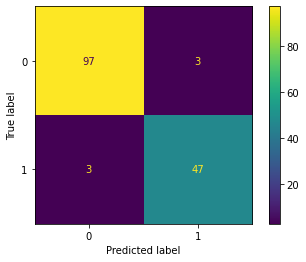

In [24]:
#HyperParameter tuning of kernel by 5-fold cv:
kernels=['linear', 'poly', 'rbf']
svc_cv_scores=[]
for k in kernels:
    svc=SVC(kernel=k)
    svc_cv_score= cross_val_score(svc, x_train, y_train, cv=5, scoring='accuracy')
    svc_cv_scores.append(svc_cv_score.mean())
optimal_kernel_index = svc_cv_scores.index(max(svc_cv_scores))
optimal_kernel= kernels[optimal_kernel_index]

SVC(kernel=optimal_kernel)
svc.fit(x_train, y_train)
svc_pred=svc.predict(x_test)

#accuracy
svc_acc_score = accuracy_score(y_test, svc_pred).round(4)
print(svc_acc_score)

#confusion matrix:
cm2=confusion_matrix(y_test, svc_pred)
ConfusionMatrixDisplay(cm2).plot()

The accuracy of SVC with best kernel parameter is 0.96.

3.Random Forest method:

0.9467


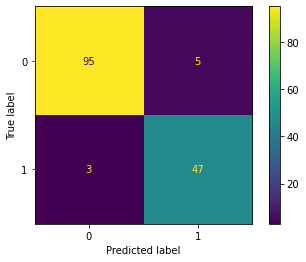

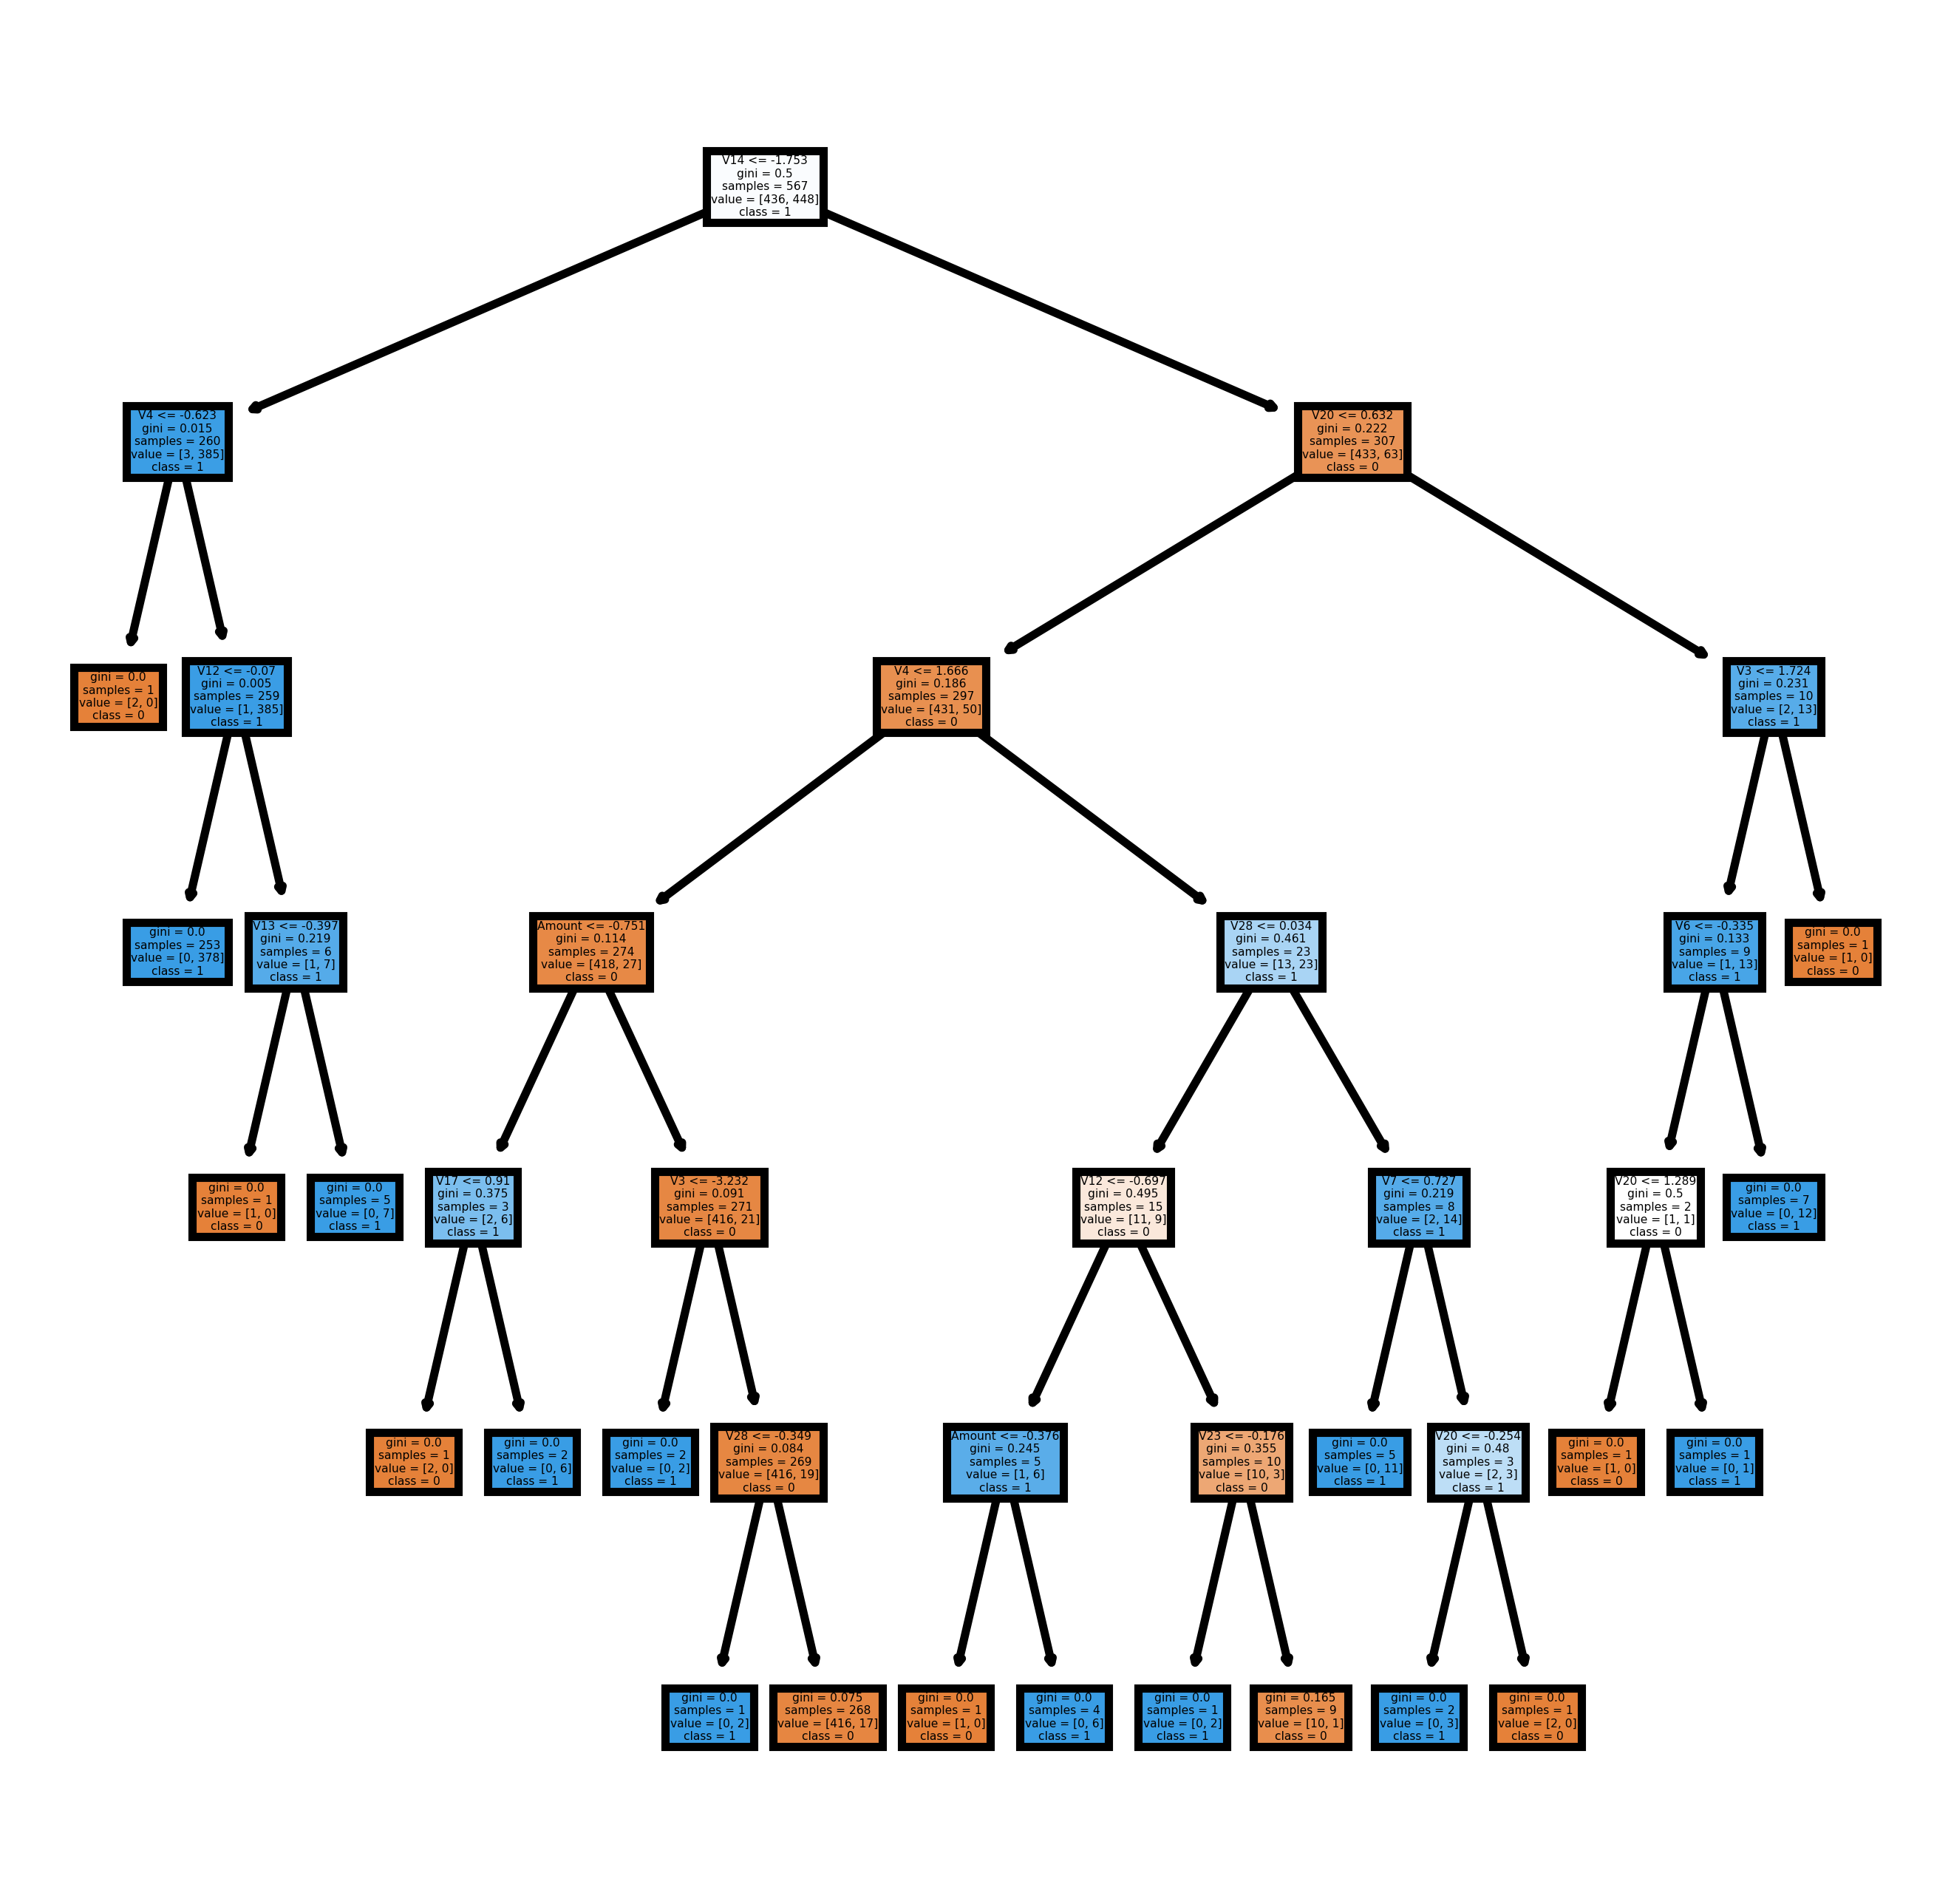

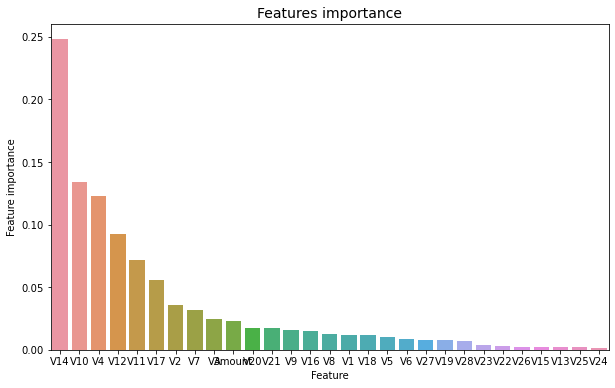

In [25]:
#HyperParameter tuning of max_depth by 5-fold cv:
depths=[5,6,7,8,9]
rf_cv_scores=[]
for d in depths:
    rf = RandomForestClassifier(max_depth=d, random_state=0)
    rf_cv_score= cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
    rf_cv_scores.append(rf_cv_score.mean())
optimal_d_index = rf_cv_scores.index(max(rf_cv_scores))
optimal_d= depths[optimal_d_index]

rf = RandomForestClassifier(max_depth=optimal_d, random_state=0)
rf.fit(x_train, y_train) 
rf_pred= rf.predict(x_test)

#accuracy
rf_acc_score = accuracy_score(y_test, rf_pred).round(4)
print(rf_acc_score)

#confusion matrix:
cm3=confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(cm3).plot()

#visualize a tree form rf:
plt.figure(figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],feature_names=x_train.columns,class_names=['0','1'],filled=True)

#features importance:
impt= pd.DataFrame({'Feature': x_train.columns, 'Feature importance': rf.feature_importances_})
impt.sort_values(by='Feature importance',ascending=False,inplace=True)
plt.figure(figsize = (10,6))
plt.title('Features importance',fontsize=14)
sns.barplot(x='Feature',y='Feature importance',data=impt)
plt.show()  

The accuracy of random forest model with best max_depth parameter is 0.95.  
V14,V10,V4 contribute the most to the classification, while V13,V24,V22,V15,V25,V26,V6 contribute the least, which corresponds to the findings in the distribution section previously.

In [26]:
#model performances:
perf= pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Support Vector Machine'], 
                   'Accuracy': [log_acc_score* 100,rf_acc_score* 100,svc_acc_score* 100]})
perf

,Model,Accuracy
0,Logistic Regression,98.00
1,Random Forest,94.67
2,Support Vector Machine,96.00


All three models predict credit card transcation pretty well, and the best one is logstic regression with prediction accuracy=0.98.

### Module 5: Summary
Summarize your findings and draw conclusions.

1. What have done: the whole data analysis on credit fruad dataset
* data pre-processing: deal with missing value, outliers
* data exploration: explore the corrleation between variables, relationship between response variable Fraud/Normal and predictor variables, as well as the distribution of each predictor
* dimension reduction: apply PCA to accomplish data visualiztion
* classification: build logistic regression, SVM, and random forest three models for prediction and compare their performance.
 
2. Main results:
* In general, there's no strong linear correlaton between each pair of variables.

* For Variable V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21, the Normal group is more intensive and its mode value does not well coincide with the Fraud group's(a translation seems to exist). While for Variable V8,V13,V15,V20,V22,V23,V24,V25,V26,V27,V28, there isn't much of a difference of distributions between two groups.

* The Fraud group has a more even time distribution. The Normal group, on the other hand, appears to have a transaction period.
* There is a significant difference in the distribution of amounts between two groups. The Fraud group's maximum amount is very small, and the distribution is relatively insentive in small transactions.

* The result of PCA plot dooesn't indicate a clear distinction between Fraud and Normal group. But there are a large number of Fraud observations that deviate significantly from the Normal group.

* All three models predict credit card transcation pretty well, and the best one is logstic regression with prediction accuracy=0.98.

3. What have learned:
* concrete technique of data analysis and mahcine learing methods by Python.
* the ideas of how to handle and utlize a real-world dataset